<a href="https://colab.research.google.com/github/Jishan-xd/F1-Analysis/blob/main/Formula(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install fastf1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.2/151.2 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 49.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.5/66.5 kB 5.3 MB/s eta 0:00:00
  Attempting uninstall: websockets
    Found existing installation: websockets 15.0.1
    Uninstalling websockets-15.0.1:
      Successfully uninstalled websockets-15.0.1


In [ ]:
import fastf1 as ff1
import pandas as pd


In [ ]:
!pip install -U fastf1

In [ ]:
import shutil
import os

# Correct path with lowercase 'content' and 'f1_cache'
shutil.rmtree('/content/f1_cache', ignore_errors=True)

os.makedirs('/content/f1_cache', exist_ok=True)


In [ ]:
import fastf1
fastf1.Cache.enable_cache('/content/f1_cache')

In [ ]:
session = fastf1.get_session(2025, 'Bahrain', 'R')
session.load()

core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.5.3]
INFO:fastf1.fastf1.core:Loading data for Bahrain Grand Prix - Race [v3.5.3]
req            INFO 	No cached data found for session_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
INFO:fastf1.api:Fetching session info data...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
INFO:fastf1.api:Fetching driver list...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_status_d

In [ ]:
laps = session.laps #to load lap data
laps.head()

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 01:23:49.780000,VER,1,0 days 00:01:27.905000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:29.666000,...,True,Red Bull Racing,0 days 01:22:21.726000,2023-09-03 13:23:22.771,1,3.0,False,,False,False
1,0 days 01:25:15.943000,VER,1,0 days 00:01:26.163000,2.0,1.0,NaT,NaT,0 days 00:00:28.274000,0 days 00:00:29.543000,...,True,Red Bull Racing,0 days 01:23:49.780000,2023-09-03 13:24:50.825,1,2.0,False,,False,True
2,0 days 01:26:41.645000,VER,1,0 days 00:01:25.702000,3.0,1.0,NaT,NaT,0 days 00:00:28.097000,0 days 00:00:29.320000,...,True,Red Bull Racing,0 days 01:25:15.943000,2023-09-03 13:26:16.988,1,2.0,False,,False,True
3,0 days 01:28:07.695000,VER,1,0 days 00:01:26.050000,4.0,1.0,NaT,NaT,0 days 00:00:28.145000,0 days 00:00:29.474000,...,True,Red Bull Racing,0 days 01:26:41.645000,2023-09-03 13:27:42.690,1,2.0,False,,False,True
4,0 days 01:29:33.871000,VER,1,0 days 00:01:26.176000,5.0,1.0,NaT,NaT,0 days 00:00:28.155000,0 days 00:00:29.514000,...,True,Red Bull Racing,0 days 01:28:07.695000,2023-09-03 13:29:08.740,1,2.0,False,,False,True


In [ ]:
laps['Driver'].unique #to check driver participated

<bound method Series.unique of 0      VER
1      VER
2      VER
3      VER
4      VER
      ... 
953    PIA
954    PIA
955    PIA
956    PIA
957    PIA
Name: Driver, Length: 958, dtype: object>

/usr/local/lib/python3.11/dist-packages/fastf1/core.py:3067: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


<Axes: title={'center': 'Verstappen- Speed over Distance'}, xlabel='Distance'>

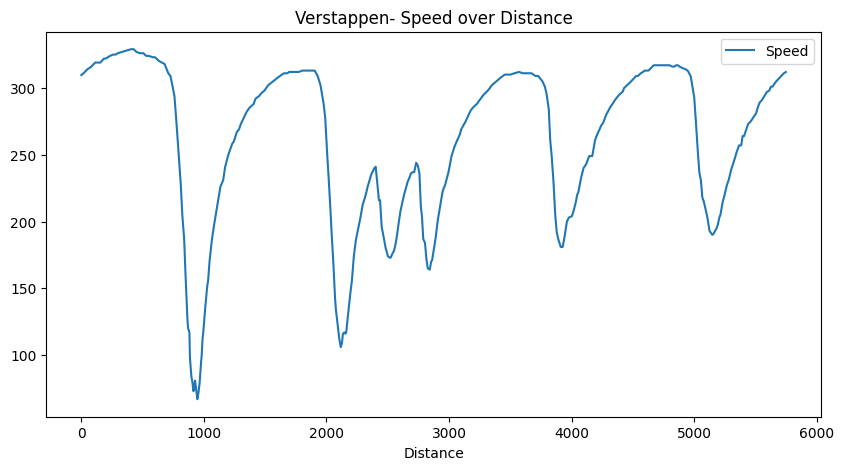

In [ ]:
verstappen_fastest_lap = laps.pick_driver('VER').pick_fastest() #pick verstappen fastest lap

telemetry = verstappen_fastest_lap.get_telemetry()#get telemetry data

telemetry.plot(x='Distance',y='Speed',figsize=(10,5),title = "Verstappen- Speed over Distance")# plot speed over distance

/usr/local/lib/python3.11/dist-packages/fastf1/core.py:3067: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


In [ ]:
laps_piastri = session.laps.pick_driver('PIA')
laps_russell = session.laps.pick_driver('RUS')
laps_leclerc = session.laps.pick_driver('LEC')

fastest_piastri = laps_piastri.pick_fastest()
fastest_russell = laps_russell.pick_fastest()
fastest_leclerc = laps_leclerc.pick_fastest()

telemetry_poastri = fastest_piastri.get_telemetry()
telemetry_russell = fastest_russell.get_telemetry()
telemetry_leclerc = fastest_leclerc.get_telemetry()

drivers = ['PIA', 'RUS', 'LEC']
telemetry_all = []

for code in drivers:
  try:
    fastest_lap = session.laps.pick_driver(code).pick_fastest()
    telemetry = fastest_lap.get_telemetry()
    telemetry['Driver'] = code
    telemetry_all.append(telemetry)
  except Exception as e:
    print(f"Could not load elementry for {code}:{e}")



/usr/local/lib/python3.11/dist-packages/fastf1/core.py:3067: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
/usr/local/lib/python3.11/dist-packages/fastf1/core.py:3067: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
/usr/local/lib/python3.11/dist-packages/fastf1/core.py:3067: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
/usr/local/lib/python3.11/dist-packages/fastf1/core.py:3067: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


In [ ]:
#adding new column
#telemetry_leclerc['Driver'] = 'LEC'

In [ ]:
import pandas as pd
telemetry_combined = pd.concat(telemetry_all)

In [ ]:
import matplotlib.pyplot as plt

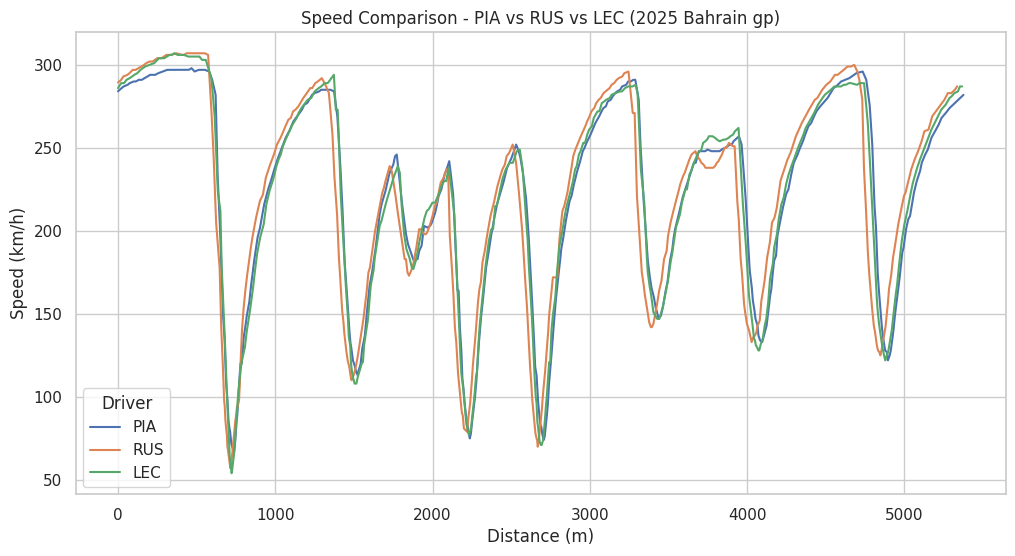

In [ ]:
import seaborn as sns
sns.set(style="whitegrid")

plt.figure(figsize=(12,6))
sns.lineplot(data=telemetry_combined, x="Distance", y="Speed", hue="Driver")
plt.title("Speed Comparison - PIA vs RUS vs LEC (2025 Bahrain gp)")
plt.xlabel("Distance (m)")
plt.ylabel("Speed (km/h)")
plt.show()

In [ ]:
telemetry_combined.to_csv('telemetry_combined.csv_bahrain_2025.csv', index=False)